# 인공 신경망

In [1]:
# keras 패키지를 tensorflow에서 임포트 하자
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = \
  keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


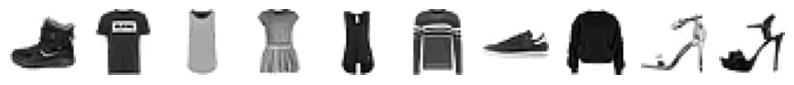

In [2]:
import matplotlib.pyplot as plt

# 옷 데이터
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')

plt.show()

In [3]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [4]:
# 클래스의 종류와 개수를 알아보자
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [5]:
# 이미지에서는 255로 나눠서 표준화 비슷한걸 하는경우가 많음
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [6]:
print(train_scaled.shape)

(60000, 784)


In [7]:
# SGDClassifier를 사용하여 경사하강법 사용해보자
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8196000000000001


## Tensorflow

2015년 구글에서 공개한 딥러닝 라이브러리 (딥러닝은 머신러닝 알고리즘의 하나로 인간의 신경계를 모사하여 학습을 진행하는 기술)

In [8]:
# 딥러닝 라이브러리는 다른 머신러닝 라이브러리와 다르게 GPU를 사용.. 병렬 처리가 가능해서 더 빠름
# 그래서 GPU의 발전과 함께 특히 각광 받고 있는 기술임!
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split # 다양한 라이브러리를 한꺼번에 사용하자

In [9]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [10]:
# 일부로 나눈 이유는 딥러닝에서는 굳이 교차 검증 필요 없음 (데이터 수가 워낙 많으니까)
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [11]:
# 밀집층 만들기 (밀집층 객체)
# 뉴런의 개수, 출력에 적용할 함수, 입력 크기 순서..
dense = keras.layers.Dense(10, activation='softmax', input_shape=(28*28,))

In [12]:
model = keras.Sequential(dense) # 단순 Sequential 모델을 만들자

In [13]:
# 타깃 값이 원-핫 인코딩이 아니라 정수로 되어있으니까 sparse_categorical_crossentropy 사용
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [14]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 8s 2ms/step - loss: 0.6054 - accuracy: 0.7949
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4744 - accuracy: 0.8394
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4500 - accuracy: 0.8466
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4384 - accuracy: 0.8520
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4290 - accuracy: 0.8555


In [15]:
# 학습한 모델로 성능 평가
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4777 - accuracy: 0.8382


[0.47766122221946716, 0.8382499814033508]

# 신경망 모델 훈련

In [69]:
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu', name='hidden'))
  if a_layer:
    model.add(a_layer) # 추가적으로 모델있으면 더하기
  model.add(keras.layers.Dense(10, activation='softmax', name='output'))
  return model

In [70]:
model = model_fn()
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [71]:
(train_input, train_target), (test_input, test_target) = \
  keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [57]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [58]:
model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [62]:
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1468 - accuracy: 0.9452 - val_loss: 0.4019 - val_accuracy: 0.8851
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1452 - accuracy: 0.9458 - val_loss: 0.3911 - val_accuracy: 0.8878
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1409 - accuracy: 0.9482 - val_loss: 0.3949 - val_accuracy: 0.8896
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1386 - accuracy: 0.9478 - val_loss: 0.3971 - val_accuracy: 0.8859
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1377 - accuracy: 0.9485 - val_loss: 0.3976 - val_accuracy: 0.8893
Epoch 6/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1307 - accuracy: 0.9511 - val_loss: 0.4234 - val_accuracy: 0.8861
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1297 - accuracy: 0.9513 - val_loss: 0.4164 - val_accuracy:

In [63]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


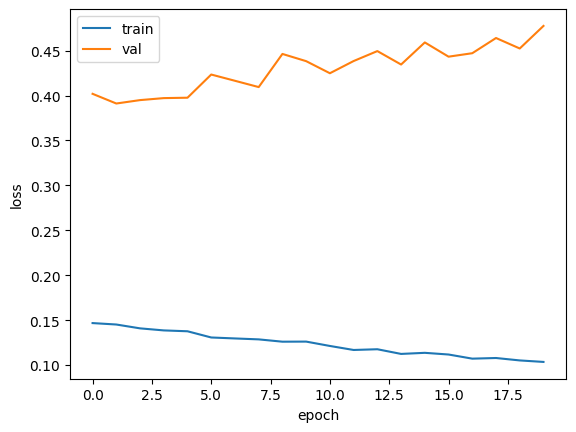

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 드롭아웃

In [72]:
model = model_fn(keras.layers.Dropout(0.3)) # 각 노드가 30% 확률로 드롭아웃된다.
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5915 - accuracy: 0.7938 - val_loss: 0.4300 - val_accuracy: 0.8437
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4389 - accuracy: 0.8422 - val_loss: 0.3851 - val_accuracy: 0.8579
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4042 - accuracy: 0.8538 - val_loss: 0.3604 - val_accuracy: 0.8687
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3807 - accuracy: 0.8594 - val_loss: 0.3499 - val_accuracy: 0.8737
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3659 - accuracy: 0.8641 - val_loss: 0.3520 - val_accuracy: 0.8726
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3514 - accuracy: 0.8705 - val_loss: 0.3426 - val_accuracy: 0.8730
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3399 - accuracy: 0.8752 - val_loss: 0.3403 - val_accuracy:

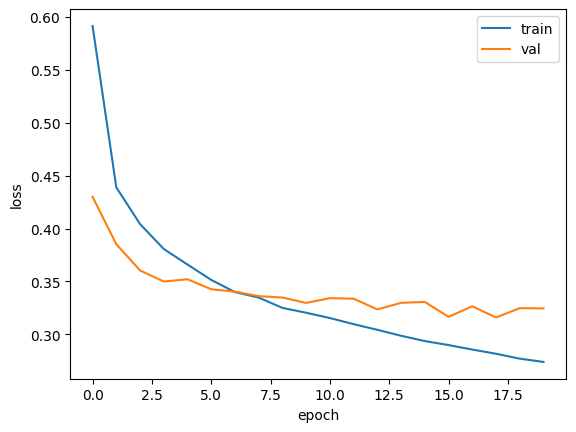

In [73]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [74]:
# 저장하는 2가지 방식
# 1. 파라미터만 저장
model.save_weights('model-weight.h5')
# 2. 구조와 파라미터 저장
model.save('model-whole.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [75]:
model = model_fn()
model.load_weights('model-weight.h5')

In [76]:
val_scaled.shape

(12000, 28, 28)

In [77]:
# model 분류할때는 각 클래스에 속할 확률을 반환한다.
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 2ms/step
0.8845


In [78]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3245 - accuracy: 0.8845


[0.32446035742759705, 0.8845000267028809]

# 콜백

훈련 과정 도중에 어떤 작업을 수행하도록 할 수 있게 만든 객체

In [80]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# 여기서 callback 객체를 사용
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5') # 모델 검증 중에 최상의 점수를 내는 모델을 저장함
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb]) # 그래픽스에서 배운 callback 같다.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [81]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3194 - accuracy: 0.8865


[0.31944024562835693, 0.8865000009536743]

In [83]:
# Early Stopping을 추가하자
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# 여기서 callback 객체를 사용
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5') # 모델 검증 중에 최상의 점수를 내는 모델을 저장함
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True) # patience는 검증 점수가 향상 안될대 참아주는 정도 그리고 restore_best_weight는 최고의 검증 점수를 내던 때로 돌아감

history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb]) # 그래픽스에서 배운 callback 같다.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [84]:
print(early_stopping_cb.stopped_epoch) # 0부터 시작하므로 13번째에서 학습이 멈춘거임

14


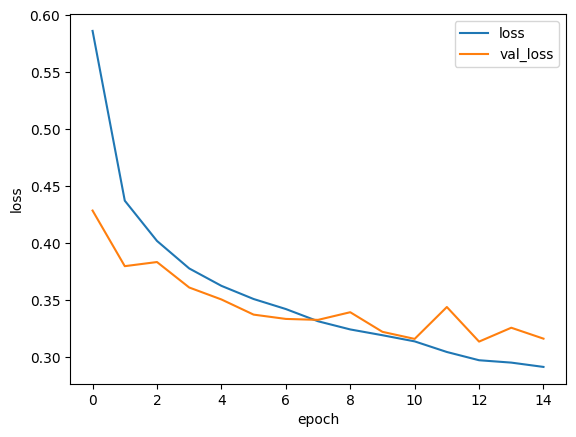

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()